In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import os
import math
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec

In [18]:
from aux_func_States import *

from functions_for_plotting import *

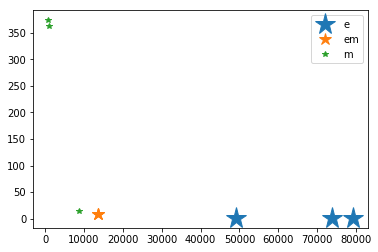

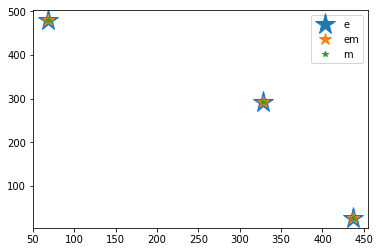

[72.483348 76.495751 96.771758]
[1288.935659]
[  3156.771241 283486.455973 305500.286878]
[1.407166 1.47613  1.749562]
[9.563379]
[ 14.230028 362.715808 373.703047]


In [19]:
em_values = pd.read_csv("~/Research/EMT_MR/crosstalk/coupledWReg_Ccode/PSF/getEMSets/state_EM_1000_res.txt").dropna()
m_values = pd.read_csv("~/Research/EMT_MR/crosstalk/coupledWReg_Ccode/PSF/getEMSets/state_M_1000_res.txt")
e_values = pd.read_csv("~/Research/EMT_MR/crosstalk/coupledWReg_Ccode/PSF/getEMSets/state_E_1000_res.txt")

e_res = np.unique(e_values.values,axis=0)
em_res = np.unique(em_values.values,axis=0)
m_res = np.unique(m_values.values,axis=0)

plt.plot(e_res[:,0],e_res[:,1],'*',label='e',markersize=22)
plt.plot(em_res[:,0],em_res[:,1],'*',label='em',markersize=12)
plt.plot(m_res[:,0],m_res[:,1],'*',label='m')
plt.legend()
plt.show()
plt.plot(e_res[:,6],e_res[:,9],'*',label='e',markersize=22)
plt.plot(em_res[:,6],em_res[:,9],'*',label='em',markersize=12)
plt.plot(m_res[:,6],m_res[:,9],'*',label='m')
plt.legend()
plt.show()

print np.unique(e_values['Z'].values)
print np.unique(em_values['Z'].values)
print np.unique(m_values['Z'].values)

print np.unique(e_values['mz'].values)
print np.unique(em_values['mz'].values)
print np.unique(m_values['mz'].values)


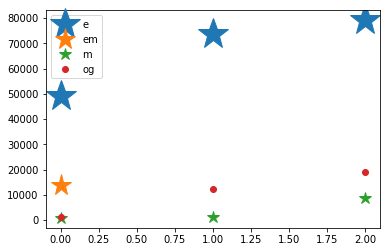

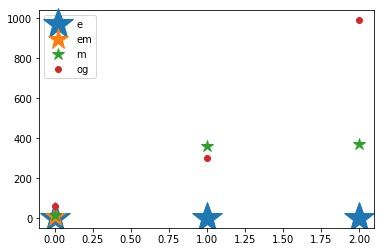

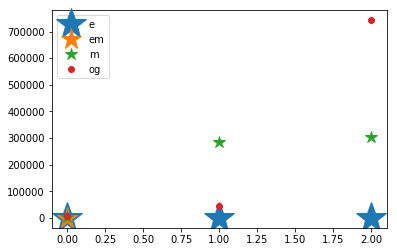

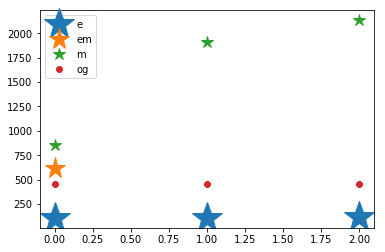

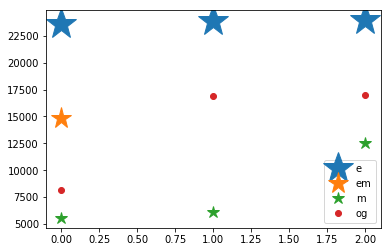

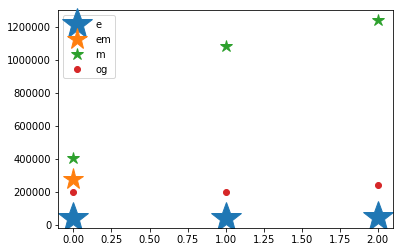

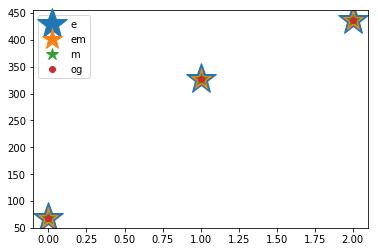

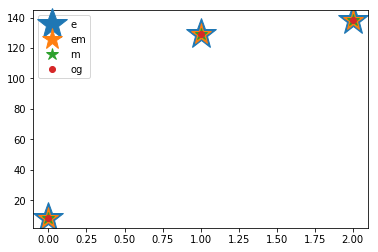

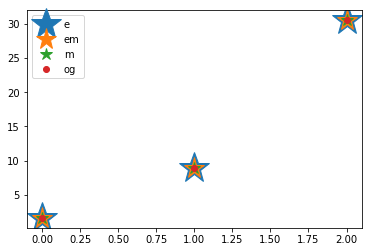

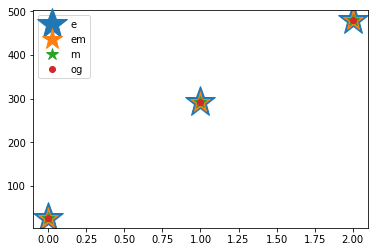

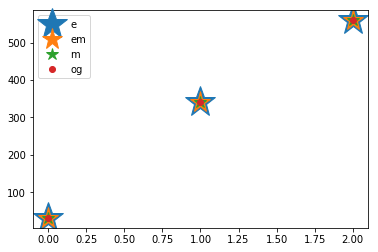

In [20]:
em_values = pd.read_csv("~/Research/EMT_MR/crosstalk/coupledWReg_Ccode/PSF/getEMSets/state_EM_1000_res.txt").dropna()
m_values = pd.read_csv("~/Research/EMT_MR/crosstalk/coupledWReg_Ccode/PSF/getEMSets/state_M_1000_res.txt")
e_values = pd.read_csv("~/Research/EMT_MR/crosstalk/coupledWReg_Ccode/PSF/getEMSets/state_E_1000_res.txt")
og_values = pd.read_csv("/home/madeline/Research/EMT_MR/crosstalk/coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt")

e_res = np.unique(e_values.values,axis=0)
em_res = np.unique(em_values.values,axis=0)
m_res = np.unique(m_values.values,axis=0)
og_res = np.unique(og_values.values,axis=0)

for key in og_values.columns:
    plt.plot(np.unique(e_values[key]),'*',label='e',markersize=32)
    plt.plot(np.unique(em_values[key]),'*',label='em',markersize=22)
    plt.plot(np.unique(m_values[key]),'*',label='m',markersize=12)
    plt.plot(np.unique(og_values[key]),'o',label='og')
    plt.legend()
    plt.show()
    
#for key in og_values.columns:
#    plt.hlines(np.unique(e_values[key]),0,1,label='e',lw=8,color='g')
#    plt.hlines(np.unique(em_values[key]),0,2,label='em',lw=6,color='r')
#    plt.hlines(np.unique(m_values[key]),0,3,label='m',lw=4,color='b')
#    plt.hlines(np.unique(og_values[key]),0,4,label='og',lw=2,color='m')
#    plt.title(key)
#    plt.legend()
#    plt.show()

In [21]:
df = pd.read_csv("../coupledWReg_Ccode/PSF/getEMSets/state_E_1000_res.txt")
res = getStates(df,PSF=True)
print res

df = pd.read_csv("../coupledWReg_Ccode/PSF/getEMSets/state_EM_1000_res.txt")
res = getStates(df,PSF=True)
print res

df = pd.read_csv("../coupledWReg_Ccode/PSF/getEMSets/state_M_1000_res.txt")
res = getStates(df,PSF=True)
print res


{'EM': 0, 'E': 88, 'WO': 43, 'M': 0, 'M/W': 0, 'EM/WO': 0, 'M/O': 0, 'O': 14, 'W': 31, 'M/WO': 0, 'EM/W': 0, 'E/O': 14, 'E/WO': 43, 'EM/O': 0, 'E/W': 31}
{'EM': 1000, 'E': 0, 'WO': 457, 'M': 0, 'M/W': 0, 'EM/WO': 457, 'M/O': 0, 'O': 139, 'W': 404, 'M/WO': 0, 'EM/W': 404, 'E/O': 0, 'E/WO': 0, 'EM/O': 139, 'E/W': 0}
{'EM': 0, 'E': 0, 'WO': 457, 'M': 1000, 'M/W': 404, 'EM/WO': 0, 'M/O': 139, 'O': 139, 'W': 404, 'M/WO': 457, 'EM/W': 0, 'E/O': 0, 'E/WO': 0, 'EM/O': 0, 'E/W': 0}


In [22]:
for i in range(6):
    df = pd.read_csv("../coupledWReg_Ccode/PSF/test/EMT_MR_test"+str(i)+"_100_res.txt")
    print df.columns
    for key in ['u','mz','Z','ms','S','G','mg','O','mo','Rmt','Rnox','mh','h','A']:
        print key,np.unique(df[key])

    #df2 =df.drop(columns=['G','O','mg','mo'])
    res = getStates(df,PSF=True)
    print 'E:',res['E'], 'EM:',res['EM'], 'M:',res['M']
    print 'O:',res['O'], 'WO:',res['WO'], 'W:',res['W'],'\n'
    
    ### MS should be abou 611 and S should be about 272000

Index([u'u', u'mz', u'Z', u'ms', u'u3', u'S', u'A', u'Rmt', u'Rnox', u'h',
       u'mh', u'G', u'O', u'mg', u'mo'],
      dtype='object')
u [13585.891845]
mz [9.085763]
Z [1238.696621]
ms [619.133207]
S [276024.588645]
G [87916.531446]
mg [43.958266]
O [32647.887853]
mo [16.323944]
Rmt [263.635664 283.531672]
Rnox [ 4.054301 46.860791]
mh [ 47.288598 615.471484]
h [ 40.533084 527.546986]
A [303.783887 488.433868]
E: 0 EM: 100 M: 0
O: 7 WO: 93 W: 0 

Index([u'u', u'mz', u'Z', u'ms', u'u3', u'S', u'A', u'Rmt', u'Rnox', u'h',
       u'mh', u'G', u'O', u'mg', u'mo'],
      dtype='object')
u [13655.261678]
mz [9.308044]
Z [1261.996578]
ms [619.133204]
S [276024.599243]
G [87911.741774]
mg [43.955871]
O [30886.782554]
mo [15.443391]
Rmt [263.63444  283.526752]
Rnox [ 4.05422  46.859128]
mh [ 47.287228 615.462102]
h [ 40.531909 527.538945]
A [303.785283 488.434618]
E: 0 EM: 100 M: 0
O: 7 WO: 93 W: 0 

Index([u'u', u'mz', u'Z', u'ms', u'u3', u'S', u'A', u'Rmt', u'Rnox', u'h',
       u'mh', u'G

In [23]:
df_og = pd.read_csv("../coupledWReg_Ccode/crosstalk_comparison/EMT_MR_comp_0_1000_res.txt")
for key in ['u','mz','Z','u3','ms','S','Rmt','Rnox','A','mh','h']:
    print key,np.unique(df_og[key])

u [ 1265.014555 12389.217608 19098.53803 ]
mz [ 62.206072 301.843678 990.401024]
Z [  5968.97567   45516.30189  742309.632898]
u3 [ 8177.938943 16908.61767  16993.323703]
ms [451.154065 458.464267 458.511561]
S [196610.267902 196878.362674 238329.654592]
Rmt [  8.372377 128.975137 138.265605]
Rnox [ 1.646083  8.949039 30.507473]
A [ 68.715505 327.638356 436.489801]
mh [ 31.108091 340.870227 559.845606]
h [ 26.664078 292.17448  479.867662]


In [24]:
print 'u mid'
print 'mz low'
print 'Z low'
print 'ms high'
print 'S high'

u mid
mz low
Z low
ms high
S high


In [25]:
df = pd.read_csv("../coupledWReg_Ccode/PSF/getEMSets/state_EM_1000_res.txt")
dfe = pd.read_csv("../coupledWReg_Ccode/PSF/getEMSets/state_E_1000_res.txt")
dfm = pd.read_csv("../coupledWReg_Ccode/PSF/getEMSets/state_M_1000_res.txt")

df1 = pd.read_csv("../coupledWReg_Ccode/PSF/crosstalk_Au/EMT_MR_Au_1_1_1000_res.txt")
df2 = pd.read_csv("../coupledWReg_Ccode/PSF/crosstalk_Au/EMT_MR_Au_5_5_1000_res.txt")
df3 = pd.read_csv("../coupledWReg_Ccode/PSF/crosstalk_Au/EMT_MR_Au_9_9_1000_res.txt")

low 0.000486396500136 0.428328106507
high 0.565830725345 0.0142070888872
[14428.635927 14590.2235  ]
[45309.580584 52632.307852]
[76276.040041 90772.277203] 

[ 870.288405 1073.054136 8673.588135]
[13730.172852]
[49063.980308 73825.236408 79138.930172] 



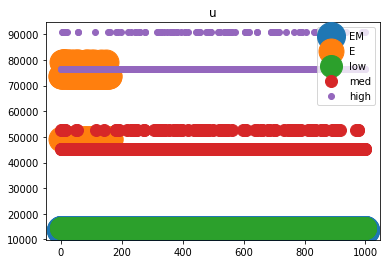

low 4.13448190449e-05 0.611376472966
high 0.00415803634718 0.523998237111
[9.396812 9.425854]
[8.271635 8.29428 ]
[8.239008 8.244327] 

[ 14.230028 362.715808 373.703047]
[9.563379]
[1.407166 1.47613  1.749562] 



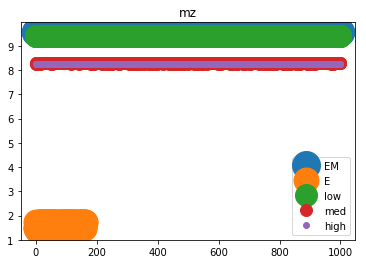

low 0.000914869878737 1.35444660394
high 0.231732988093 0.508781298622
[1186.140302 1204.107761]
[450.304463 468.574637]
[420.50865  425.970966] 

[  3156.771241 283486.455973 305500.286878]
[1288.935659]
[72.483348 76.495751 96.771758] 



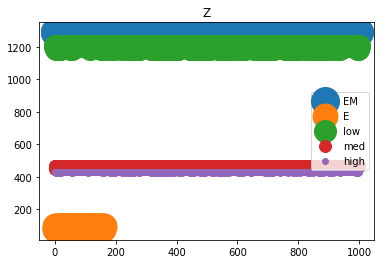

low 5.12607301558e-17 0.546533154427
high 2.28159674905e-15 0.546533214496
[619.133211 619.133213]
[619.133268]
[619.133269 619.13327 ] 

[ 858.250249 1909.715934 2133.150761]
[619.133201]
[106.727647 109.630637 120.071549] 



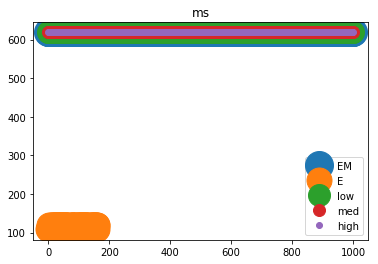

low 5.49678824144e-14 0.0413986235702
high 2.58345542351e-12 0.0413980642229
[14882.91256  14882.914158]
[14882.958338 14882.958963]
[14882.959756 14882.959928] 

[ 5565.475055  6158.785889 12503.069362]
[14882.904691]
[23595.861327 23864.043903 23939.476793] 



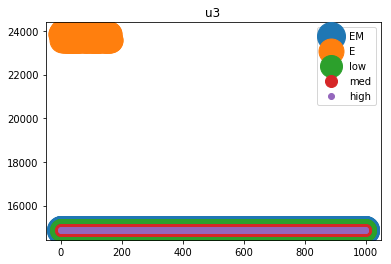

low 3.8181999434e-15 0.637363488701
high 1.79461655184e-13 0.637362910395
[276024.565467 276024.573278]
[276024.346455 276024.349508]
[276024.341736 276024.342576] 

[ 402607.246432 1084128.311474 1240200.804584]
[276024.611742]
[41450.173395 42615.550515 46823.420154] 



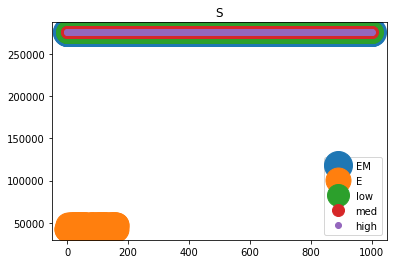

low 0.185274075384 0.162298229475
high 0.184090207571 0.158832000935
[303.78191  488.432276]
[303.760897 488.421418]
[303.760569 488.421301] 

[ 68.715505 327.638356 436.489801]
[ 68.715505 327.638356 436.489801]
[ 68.715505 327.638356 436.489801] 



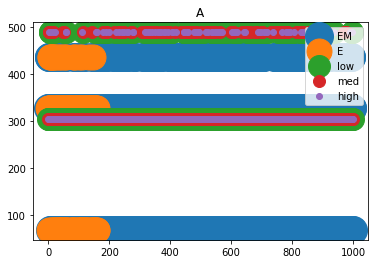

low 0.960880051961 0.859553261668
high 0.960633549805 0.85865386951
[263.637399 283.542112]
[263.655816 283.613263]
[263.656103 283.614029] 

[  8.372377 128.975137 138.265605]
[  8.372377 128.975137 138.265605]
[  8.372377 128.975137 138.265605] 



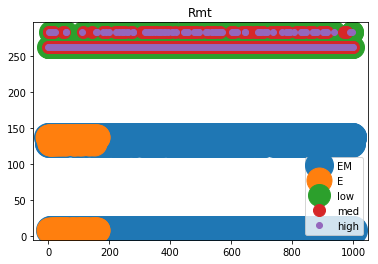

low 0.530293785111 0.512975647301
high 0.524448602978 0.499258549505
[ 4.054474 46.863148]
[ 4.055649 46.888193]
[ 4.055662 46.888584] 

[ 1.646083  8.949039 30.507473]
[ 1.646083  8.949039 30.507473]
[ 1.646083  8.949039 30.507473] 



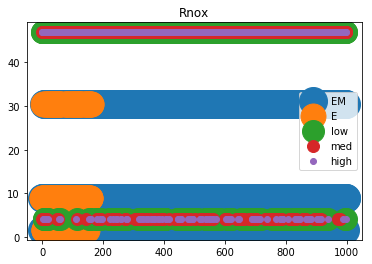

low 0.316623852492 0.249860886048
high 0.312415196286 0.243970068067
[ 40.535575 527.558381]
[ 40.552567 527.679451]
[ 40.55275  527.681338] 

[ 26.664078 292.17448  479.867662]
[ 26.664078 292.17448  479.867662]
[ 26.664078 292.17448  479.867662] 



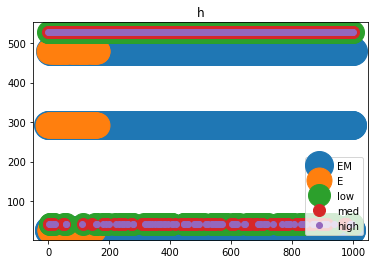

low 0.316623850944 0.249860884923
high 0.312415197286 0.24397006865
[ 47.291505 615.484777]
[ 47.311328 615.626026]
[ 47.311541 615.628228] 

[ 31.108091 340.870227 559.845606]
[ 31.108091 340.870227 559.845606]
[ 31.108091 340.870227 559.845606] 



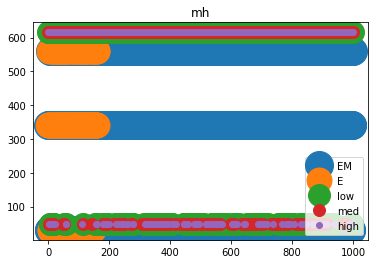

low 7.63333626278e-09 1.4247763388e-07
high 2.00280217878e-07 2.75997133216e-10
[87923.318392 87926.694475]
[87995.47369  87995.982723]
[87996.599372 87996.728513] 

[44001.54313  44001.931242 86658.067979]
[87905.980617]
[87999.960125 87999.980305 87999.983244] 



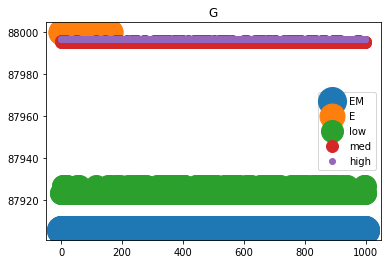

low 6.76036564405e-07 0.000133290899483
high 7.46435605134e-05 1.38644238187e-05
[29051.521302 29063.000027]
[29549.344649 29562.478084]
[29580.031259 29583.981181] 

[21598.46748  21627.435933 27975.541237]
[28997.763519]
[29824.565102 29840.069063 29843.143388] 



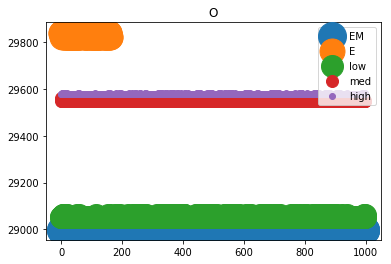

low 7.63352229599e-09 1.42478655654e-07
high 2.00285240952e-07 2.75885179035e-10
[43.961659 43.963347]
[43.997737 43.997991]
[43.9983   43.998364] 

[22.000772 22.000966 43.329034]
[43.95299]
[43.99998  43.99999  43.999992] 



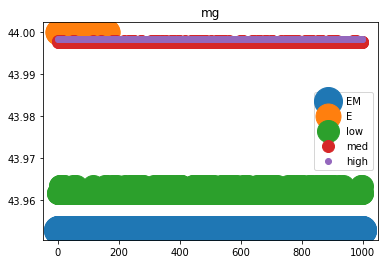

low 6.76039857342e-07 0.000133290971794
high 7.46436259124e-05 1.38644383551e-05
[14.525761 14.5315  ]
[14.774672 14.781239]
[14.790016 14.791991] 

[10.799234 10.813718 13.987771]
[14.498882]
[14.912283 14.920035 14.921572] 



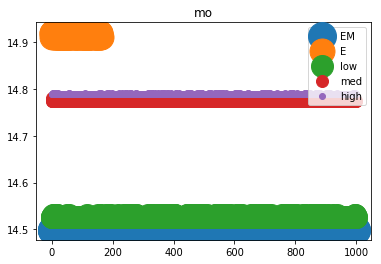

2.31113959443 5.65426222635 3.09587419147 4.27699309981


In [26]:
tmp1,tmp2,tmp3,tmp4=0,0,0,0
for key in df.columns:#['u','u3','ms','S','mz','Z','G','O','mg','mo']:
    plt.plot(df[key],'o',markersize=28,label='EM')
    plt.plot(dfe[key],'o',markersize=25,label='E')
    plt.plot(df1[key],'o',markersize=22,label='low')
    plt.plot(df2[key],'o',markersize=12,label='med')    
    plt.plot(df3[key],'o',label='high')
    print 'low',np.mean(np.log10(df1[key]/df[key])**2),np.mean(np.log10(df1[key]/dfe[key])**2)
    print 'high',np.mean(np.log10(df3[key]/df[key])**2),np.mean(np.log10(df3[key]/dfe[key])**2)
   
    print np.unique(df1[key])
    print np.unique(df2[key])
    print np.unique(df3[key]),'\n'
    print np.unique(dfm[key])
    print np.unique(df[key])
    print np.unique(dfe[key]),'\n'
    
    
    tmp1+=np.mean(np.log10(df1[key]/df[key])**2)
    tmp2+=np.mean(np.log10(df1[key]/dfe[key])**2)
    tmp3+=np.mean(np.log10(df3[key]/df[key])**2)
    tmp4+=np.mean(np.log10(df3[key]/dfe[key])**2)
    plt.legend()
    plt.title(key)
    plt.show()
print tmp1,tmp2,tmp3,tmp4